In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#from google.colab import files
#uploaded = files.upload()


In [5]:
from google.colab import drive


#Mount Google Drive
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


In [6]:
# Define the path to the excel file (replace with your file path on Google Drive)
file_path = '/content/MyDrive/MyDrive/Queen Street1C.xlsx'


In [7]:
# Read the .xlsx file into a DataFrame
df1 = pd.read_excel(file_path)



In [8]:
# Display the first few rows of the DataFrame
print(df1.head())

  Site       Date      Time Parameter  Value
0  QUS 2006-01-01  00:00:00       AQI   25.0
1  QUS 2006-01-01  01:00:00       AQI   26.0
2  QUS 2006-01-01  02:00:00       AQI   19.0
3  QUS 2006-01-01  03:00:00       AQI   18.0
4  QUS 2006-01-01  04:00:00       AQI   24.0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877795 entries, 0 to 877794
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Site       877795 non-null  object        
 1   Date       877795 non-null  datetime64[ns]
 2   Time       877795 non-null  object        
 3   Parameter  877795 non-null  object        
 4   Value      877795 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 33.5+ MB


In [10]:
# Check for missing values in a specific column, for example, 'Date'
missing_values = df1['Date'].isnull()

# Print rows where the 'Date' column has missing values
missing_rows = df1[missing_values]

# Count of missing values in the 'Date' column
missing_count = missing_values.sum()

# Display the results
print(f"Rows with missing 'Date' values:\n{missing_rows}")
print(f"Total missing values in 'Date' column: {missing_count}")

Rows with missing 'Date' values:
Empty DataFrame
Columns: [Site, Date, Time, Parameter, Value]
Index: []
Total missing values in 'Date' column: 0


In [11]:
# Check for missing values in a specific column, for example, 'Time'
missing_values = df1['Time'].isnull()

# Print rows where the 'Time' column has missing values
missing_rows = df1[missing_values]

# Count of missing values in the 'Time' column
missing_count = missing_values.sum()

# Display the results
print(f"Rows with missing 'Time' values:\n{missing_rows}")
print(f"Total missing values in 'Time' column: {missing_count}")

Rows with missing 'Time' values:
Empty DataFrame
Columns: [Site, Date, Time, Parameter, Value]
Index: []
Total missing values in 'Time' column: 0


In [12]:
# Convert the 'Time' column to string using apply
df1['Time'] = df1['Time'].apply(str)

# Display the DataFrame
print(df1)

       Site       Date      Time Parameter  Value
0       QUS 2006-01-01  00:00:00       AQI   25.0
1       QUS 2006-01-01  01:00:00       AQI   26.0
2       QUS 2006-01-01  02:00:00       AQI   19.0
3       QUS 2006-01-01  03:00:00       AQI   18.0
4       QUS 2006-01-01  04:00:00       AQI   24.0
...     ...        ...       ...       ...    ...
877790  QUS 2023-03-27  23:00:00       AQI   12.0
877791  QUS 2023-03-28  00:00:00       AQI   11.0
877792  QUS 2023-03-28  01:00:00       AQI    6.0
877793  QUS 2023-03-28  02:00:00       AQI    7.0
877794  QUS 2023-03-28  03:00:00       AQI    8.0

[877795 rows x 5 columns]


In [13]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877795 entries, 0 to 877794
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Site       877795 non-null  object        
 1   Date       877795 non-null  datetime64[ns]
 2   Time       877795 non-null  object        
 3   Parameter  877795 non-null  object        
 4   Value      877795 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 33.5+ MB


In [14]:

# Step 1: Remove 'am'/'pm' (if present) from Time column
df1['Time'] = df1['Time'].str.replace(r'(\s*\b(am|pm|AM|PM)\b\s*)+', '', regex=True)

# Step 2: Ensure Time is in the format HH:MM:SS, add seconds if necessary
df1['Time'] = df1['Time'].apply(lambda x: x + ':00' if isinstance(x, str) and len(x.split(':')) == 2 else x)

# Step 3: Fill missing Time values (optional) or handle as needed
# Example: Fill NaN in 'Time' with a default value like '00:00:00'
df1['Time'] = df1['Time'].fillna('00:00:00')

# Step 4: Merge Date and Time into a new 'Datetime' column
df1['Datetime'] = pd.to_datetime(df1['Date'].dt.strftime('%Y-%m-%d') + ' ' + df1['Time'], errors='coerce')

# Create the 'Datetime' column as before
df1['Datetime'] = pd.to_datetime(df1['Date'].dt.strftime('%Y-%m-%d') + ' ' + df1['Time'], errors='coerce')

# Drop 'Date' and 'Time' columns
df1 = df1.drop(['Date','Time'], axis=1)

# Display the updated dataframe to verify
print(df1.head())

  Site Parameter  Value            Datetime
0  QUS       AQI   25.0 2006-01-01 00:00:00
1  QUS       AQI   26.0 2006-01-01 01:00:00
2  QUS       AQI   19.0 2006-01-01 02:00:00
3  QUS       AQI   18.0 2006-01-01 03:00:00
4  QUS       AQI   24.0 2006-01-01 04:00:00


In [15]:
# Replace all occurrences of 'QUS' with 'QUS1' in the 'Site' column
df1['Site'] = df1['Site'].replace('QUS', 'QUS1')


# Display the updated DataFrame to confirm the changes
df1.head()

Site Parameter  Value            Datetime
0  QUS1       AQI   25.0 2006-01-01 00:00:00
1  QUS1       AQI   26.0 2006-01-01 01:00:00
2  QUS1       AQI   19.0 2006-01-01 02:00:00
3  QUS1       AQI   18.0 2006-01-01 03:00:00
4  QUS1       AQI   24.0 2006-01-01 04:00:00

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877795 entries, 0 to 877794
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Site       877795 non-null  object        
 1   Parameter  877795 non-null  object        
 2   Value      877795 non-null  float64       
 3   Datetime   877299 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 26.8+ MB


In [17]:
# Aggregate duplicates by taking the mean (or another aggregation function)
df1_agg = df1.groupby(['Site', 'Datetime', 'Parameter'], as_index=False).mean()

# Now perform the pivot operation
df1_pivot = df1_agg.pivot(index=['Site', 'Datetime'], columns='Parameter', values='Value').reset_index()
df1 = df1_pivot

# Display the resulting DataFrame
df1.head()

Parameter  Site            Datetime   AQI      NO    NO2         NOx  PM10  \
0          QUS1 2006-01-01 00:00:00  25.0   49.17  34.65  110.044000   NaN   
1          QUS1 2006-01-01 01:00:00  26.0  107.21  55.95  220.338667   NaN   
2          QUS1 2006-01-01 02:00:00  19.0   46.13  41.38  112.112667   NaN   
3          QUS1 2006-01-01 03:00:00  18.0   49.50  38.54  114.440000   NaN   
4          QUS1 2006-01-01 04:00:00  24.0   75.53  51.94  167.752667   NaN   

Parameter  PM2.5  RH  Temp  WD  WS  
0            NaN NaN   NaN NaN NaN  
1            NaN NaN   NaN NaN NaN  
2            NaN NaN   NaN NaN NaN  
3            NaN NaN   NaN NaN NaN  
4            NaN NaN   NaN NaN NaN

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149796 entries, 0 to 149795
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Site      149796 non-null  object        
 1   Datetime  149796 non-null  datetime64[ns]
 2   AQI       125870 non-null  float64       
 3   NO        141892 non-null  float64       
 4   NO2       141870 non-null  float64       
 5   NOx       133154 non-null  float64       
 6   PM10      53599 non-null   float64       
 7   PM2.5     48355 non-null   float64       
 8   RH        19549 non-null   float64       
 9   Temp      48912 non-null   float64       
 10  WD        41292 non-null   float64       
 11  WS        33682 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 13.7+ MB


In [19]:
# Move 'Datetime' column to the first position and set it as the index
df1 = df1.set_index('Datetime').reset_index().reindex(columns=['Datetime'] + [col for col in df1.columns if col != 'Datetime'])

# Display the updated DataFrame to confirm changes
df1.head()

Parameter            Datetime  Site   AQI      NO    NO2         NOx  PM10  \
0         2006-01-01 00:00:00  QUS1  25.0   49.17  34.65  110.044000   NaN   
1         2006-01-01 01:00:00  QUS1  26.0  107.21  55.95  220.338667   NaN   
2         2006-01-01 02:00:00  QUS1  19.0   46.13  41.38  112.112667   NaN   
3         2006-01-01 03:00:00  QUS1  18.0   49.50  38.54  114.440000   NaN   
4         2006-01-01 04:00:00  QUS1  24.0   75.53  51.94  167.752667   NaN   

Parameter  PM2.5  RH  Temp  WD  WS  
0            NaN NaN   NaN NaN NaN  
1            NaN NaN   NaN NaN NaN  
2            NaN NaN   NaN NaN NaN  
3            NaN NaN   NaN NaN NaN  
4            NaN NaN   NaN NaN NaN

In [20]:
# Count total missing values in the DataFrame
total_missing_values = df1.isna().sum().sum()
print(f"Total missing values: {total_missing_values}")

# Count total values in the DataFrame (total number of elements)
total_values = df1.size  # Total number of elements in the DataFrame
print("Total values in DataFrame:", total_values)

# Calculate percentage of missing values
missing_percentage = (total_missing_values / total_values) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")


Total missing values: 709785
Total values in DataFrame: 1797552
Percentage of missing values: 39.49%


In [21]:
# Calculate the percentage of missing values per column
missing_percentage = df1.isnull().mean() * 100

# Print the missing percentage per column
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
Parameter
Datetime     0.000000
Site         0.000000
AQI         15.972389
NO           5.276509
NO2          5.291196
NOx         11.109776
PM10        64.218671
PM2.5       67.719432
RH          86.949585
Temp        67.347593
WD          72.434511
WS          77.514753
dtype: float64


In [22]:
# Define the start and end datetime
start_Datetime = pd.to_datetime('2018/01/01 00:00:00', format='%Y/%m/%d %H:%M:%S')
end_Datetime = pd.to_datetime('2023/02/28 00:00:00', format='%Y/%m/%d %H:%M:%S')

# Filter the DataFrame for rows within the date and time range
df1_filtered = df1[(df1['Datetime'] >= start_Datetime) & (df1['Datetime'] <= end_Datetime)]

# Display the filtered DataFrame
print(df1_filtered)

Parameter            Datetime  Site   AQI    NO   NO2    NOx  PM10  PM2.5  \
103261    2018-01-01 00:00:00  QUS1  24.0   3.1  11.6   14.7   7.5    3.7   
103262    2018-01-01 01:00:00  QUS1  24.0  86.5  65.2  151.7  14.1    7.0   
103263    2018-01-01 02:00:00  QUS1  25.0  59.9  37.7   97.6  15.5    8.6   
103264    2018-01-01 03:00:00  QUS1  25.0  39.5  29.0   68.5  11.9    5.1   
103265    2018-01-01 04:00:00  QUS1  25.0  30.0  22.8   52.8  12.9    5.1   
...                       ...   ...   ...   ...   ...    ...   ...    ...   
149027    2023-02-27 20:00:00  QUS1   8.0  16.1   8.1   24.2  14.0    6.0   
149028    2023-02-27 21:00:00  QUS1   9.0  12.8   8.8   21.7  14.0    6.0   
149029    2023-02-27 22:00:00  QUS1   9.0  15.4   9.6   25.1  13.0    6.0   
149030    2023-02-27 23:00:00  QUS1   8.0  16.1   8.3   24.4  12.0    5.0   
149031    2023-02-28 00:00:00  QUS1   8.0  14.3   6.0   20.4  14.0    7.0   

Parameter    RH  Temp     WD   WS  
103261      NaN  20.0   44.0  0.2  
103

In [23]:
# Calculate the percentage of missing values per column
missing_percentage = df1_filtered.isnull().mean() * 100

# Print the missing percentage per column
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
Parameter
Datetime     0.000000
Site         0.000000
AQI         40.958249
NO           9.824998
NO2          9.873064
NOx          9.824998
PM10         7.050316
PM2.5        7.072164
RH          58.956545
Temp        12.678333
WD          13.237640
WS          29.863888
dtype: float64


In [24]:
# Count total missing values in the DataFrame
total_missing_values = df1_filtered.isna().sum().sum()
print(f"Total missing values: {total_missing_values}")

# Count total values in the DataFrame (total number of elements)
total_values = df1_filtered.size  # Total number of elements in the DataFrame
print("Total values in DataFrame:", total_values)

# Calculate percentage of missing values
missing_percentage = (total_missing_values / total_values) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Total missing values: 91240
Total values in DataFrame: 549252
Percentage of missing values: 16.61%


In [25]:
# Save df1 to a CSV file
df1_filtered.to_csv('df1-filtered.csv', index=False)

print("DataFrame saved as 'df1-filtered.csv'.")

DataFrame saved as 'df1-filtered.csv'.


In [26]:
# Define the path to the excel file (replace with your file path on Google Drive)
file_path = '/content/MyDrive/MyDrive/Queen Street2C.xlsx'

In [27]:
# Read the .xlsx file into a DataFrame
df2 = pd.read_excel(file_path)

In [28]:
df2.head(10)

Site       Date      Time Parameter  Value
0  QUS 2022-07-01  01:00:00        NO    5.0
1  QUS 2022-07-01  02:00:00        NO    4.6
2  QUS 2022-07-01  03:00:00        NO    5.0
3  QUS 2022-07-01  04:00:00        NO    5.2
4  QUS 2022-07-01  05:00:00        NO    5.9
5  QUS 2022-07-01  06:00:00        NO    7.2
6  QUS 2022-07-01  07:00:00        NO    7.9
7  QUS 2022-07-01  08:00:00        NO   15.3
8  QUS 2022-07-01  09:00:00        NO   41.6
9  QUS 2022-07-01  10:00:00        NO   44.1

In [29]:
# Replace 'TEMP' with 'Temp' in the 'Parameter' column of df2
df2['Parameter'] = df2['Parameter'].replace('TEMP', 'Temp')

# Display the unique values in the 'Parameter' column to confirm the change
print(df2['Parameter'].unique())

['NO' 'NO2' 'NOx' 'PM10' 'PM2.5' 'RH' 'Temp' 'WD' 'WS' 'AQI' 'TrafficV'
 'City_Centre_TVCount' 'Total_Pedestrians']


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Site       245955 non-null  object        
 1   Date       245955 non-null  datetime64[ns]
 2   Time       245955 non-null  object        
 3   Parameter  245955 non-null  object        
 4   Value      245619 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 9.4+ MB


In [31]:
# Convert the 'Time' column to string using apply
df2['Time'] = df2['Time'].apply(str)

# Display the DataFrame
print(df2)

       Site       Date      Time Parameter       Value
0       QUS 2022-07-01  01:00:00        NO    5.000000
1       QUS 2022-07-01  02:00:00        NO    4.600000
2       QUS 2022-07-01  03:00:00        NO    5.000000
3       QUS 2022-07-01  04:00:00        NO    5.200000
4       QUS 2022-07-01  05:00:00        NO    5.900000
...     ...        ...       ...       ...         ...
245950  QUS 2012-12-27  00:00:00       NOx  119.379522
245951  QUS 2012-12-28  00:00:00       NOx   77.732527
245952  QUS 2012-12-29  00:00:00       NOx   77.062901
245953  QUS 2012-12-30  00:00:00       NOx   71.255332
245954  QUS 2012-12-31  00:00:00       NOx   95.183501

[245955 rows x 5 columns]


In [32]:
# Step 1: Ensure Date column is in the correct datetime format
#df2['Date'] = pd.to_datetime(df2['Date'])

# Step 2: Convert the Time column to string to ensure it can be processed as text
#df2['Time'] = df2['Time'].astype(str)

# Step 3: Clean Time column by replacing invalid time formats (like extra AM/PM)
# We'll use regex to replace any extra or malformed time strings
df2['Time'] = df2['Time'].str.replace(r'(\s*\b(am|pm|AM|PM)\b\s*)+', '', regex=True)

# Step 4: Ensure Time is in the format of HH:MM:SS, fill missing seconds if necessary
df2['Time'] = df2['Time'].apply(lambda x: x if len(x.split(':')) == 3 else x + ':00')

# Step 5: Merge Date and Time into a new 'Datetime' column
df2['Datetime'] = pd.to_datetime(df2['Date'].dt.strftime('%Y-%m-%d') + ' ' + df2['Time'], errors='coerce')

# Step 6: Optionally drop the original Date and Time columns
df2 = df2.drop(columns=['Date', 'Time'])

# Display the updated DataFrame
print(df2.dtypes)
print(df2.head())

Site                 object
Parameter            object
Value               float64
Datetime     datetime64[ns]
dtype: object
  Site Parameter  Value            Datetime
0  QUS        NO    5.0 2022-07-01 01:00:00
1  QUS        NO    4.6 2022-07-01 02:00:00
2  QUS        NO    5.0 2022-07-01 03:00:00
3  QUS        NO    5.2 2022-07-01 04:00:00
4  QUS        NO    5.9 2022-07-01 05:00:00


In [33]:
# Aggregate duplicates by taking the mean (or another aggregation function)
df2_agg = df2.groupby(['Site', 'Datetime', 'Parameter'], as_index=False).mean()

# Now perform the pivot operation
df2_pivot = df2_agg.pivot(index=['Site', 'Datetime'], columns='Parameter', values='Value').reset_index()

df2 = df2_pivot

# Display the resulting DataFrame
df2.head()

Parameter Site   Datetime  AQI  City_Centre_TVCount  NO  NO2         NOx  \
0          QUS 2004-01-31  NaN                  NaN NaN  NaN  208.021944   
1          QUS 2004-02-01  NaN                  NaN NaN  NaN  170.431389   
2          QUS 2004-02-02  NaN                  NaN NaN  NaN  238.845556   
3          QUS 2004-02-03  NaN                  NaN NaN  NaN  167.775556   
4          QUS 2004-02-04  NaN                  NaN NaN  NaN  162.131111   

Parameter  PM10  PM2.5  RH  Temp  Total_Pedestrians  TrafficV  WD  WS  
0           NaN    NaN NaN   NaN                NaN       NaN NaN NaN  
1           NaN    NaN NaN   NaN                NaN       NaN NaN NaN  
2           NaN    NaN NaN   NaN                NaN       NaN NaN NaN  
3           NaN    NaN NaN   NaN                NaN       NaN NaN NaN  
4           NaN    NaN NaN   NaN                NaN       NaN NaN NaN

In [34]:
# Replace all occurrences of 'QUS' with 'QUS1' in the 'Site' column
df2['Site'] = df2['Site'].replace('QUS', 'QUS2')

# Display the updated DataFrame to confirm the changes
df2.head()

Parameter  Site   Datetime  AQI  City_Centre_TVCount  NO  NO2         NOx  \
0          QUS2 2004-01-31  NaN                  NaN NaN  NaN  208.021944   
1          QUS2 2004-02-01  NaN                  NaN NaN  NaN  170.431389   
2          QUS2 2004-02-02  NaN                  NaN NaN  NaN  238.845556   
3          QUS2 2004-02-03  NaN                  NaN NaN  NaN  167.775556   
4          QUS2 2004-02-04  NaN                  NaN NaN  NaN  162.131111   

Parameter  PM10  PM2.5  RH  Temp  Total_Pedestrians  TrafficV  WD  WS  
0           NaN    NaN NaN   NaN                NaN       NaN NaN NaN  
1           NaN    NaN NaN   NaN                NaN       NaN NaN NaN  
2           NaN    NaN NaN   NaN                NaN       NaN NaN NaN  
3           NaN    NaN NaN   NaN                NaN       NaN NaN NaN  
4           NaN    NaN NaN   NaN                NaN       NaN NaN NaN

In [35]:
# Move 'Datetime' column to the first position and set it as the index
df2 = df2.set_index('Datetime').reset_index().reindex(columns=['Datetime'] + [col for col in df2.columns if col != 'Datetime'])

# Display the updated DataFrame to confirm changes
df2.head()

Parameter   Datetime  Site  AQI  City_Centre_TVCount  NO  NO2         NOx  \
0         2004-01-31  QUS2  NaN                  NaN NaN  NaN  208.021944   
1         2004-02-01  QUS2  NaN                  NaN NaN  NaN  170.431389   
2         2004-02-02  QUS2  NaN                  NaN NaN  NaN  238.845556   
3         2004-02-03  QUS2  NaN                  NaN NaN  NaN  167.775556   
4         2004-02-04  QUS2  NaN                  NaN NaN  NaN  162.131111   

Parameter  PM10  PM2.5  RH  Temp  Total_Pedestrians  TrafficV  WD  WS  
0           NaN    NaN NaN   NaN                NaN       NaN NaN NaN  
1           NaN    NaN NaN   NaN                NaN       NaN NaN NaN  
2           NaN    NaN NaN   NaN                NaN       NaN NaN NaN  
3           NaN    NaN NaN   NaN                NaN       NaN NaN NaN  
4           NaN    NaN NaN   NaN                NaN       NaN NaN NaN

In [36]:
# Count total missing values in the DataFrame
total_missing_values = df2.isna().sum().sum()
print(f"Total missing values: {total_missing_values}")

# Count total values in the DataFrame (total number of elements)
total_values = df2.size  # Total number of elements in the DataFrame
print("Total values in DataFrame:", total_values)

# Calculate percentage of missing values
missing_percentage = (total_missing_values / total_values) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Total missing values: 422275
Total values in DataFrame: 770535
Percentage of missing values: 54.80%


In [37]:
# Calculate the percentage of missing values per column
missing_percentage = df2.isnull().mean() * 100

# Print the missing percentage per column
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
Parameter
Datetime                0.000000
Site                    0.000000
AQI                    67.786019
City_Centre_TVCount    11.230509
NO                     90.646110
NO2                    89.943351
NOx                    89.316514
PM10                   90.537094
PM2.5                  90.533201
RH                     87.965504
Temp                   83.826822
Total_Pedestrians      10.669859
TrafficV               11.372618
WD                     83.830715
WS                     14.384162
dtype: float64


In [38]:
# Define the start and end datetime
start_Datetime = pd.to_datetime('2018/01/01 00:00:00', format='%Y/%m/%d %H:%M:%S')
end_Datetime = pd.to_datetime('2023/02/28 00:00:00', format='%Y/%m/%d %H:%M:%S')

# Filter the DataFrame for rows within the date and time range
df2_filtered = df2[(df2['Datetime'] >= start_Datetime) & (df2['Datetime'] <= end_Datetime)]

# Display the filtered DataFrame
print(df2_filtered)

Parameter            Datetime  Site  AQI  City_Centre_TVCount  NO  NO2  NOx  \
1927      2018-01-01 00:00:00  QUS2  NaN              29053.0 NaN  NaN  NaN   
1928      2018-01-01 01:00:00  QUS2  NaN              26201.0 NaN  NaN  NaN   
1929      2018-01-01 02:00:00  QUS2  NaN              16591.0 NaN  NaN  NaN   
1930      2018-01-01 03:00:00  QUS2  NaN              11818.0 NaN  NaN  NaN   
1931      2018-01-01 04:00:00  QUS2  NaN               9065.0 NaN  NaN  NaN   
...                       ...   ...  ...                  ...  ..  ...  ...   
47139     2023-02-27 20:00:00  QUS2  NaN              18096.0 NaN  NaN  NaN   
47140     2023-02-27 21:00:00  QUS2  NaN              15305.0 NaN  NaN  NaN   
47141     2023-02-27 22:00:00  QUS2  NaN              10708.0 NaN  NaN  NaN   
47142     2023-02-27 23:00:00  QUS2  NaN               6894.0 NaN  NaN  NaN   
47143     2023-02-28 00:00:00  QUS2  NaN               4043.0 NaN  NaN  NaN   

Parameter  PM10  PM2.5  RH  Temp  Total_Pedestrians

In [39]:
# Calculate the percentage of missing values per column
missing_percentage = df2_filtered.isnull().mean() * 100

# Print the missing percentage per column
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
Parameter
Datetime                0.000000
Site                    0.000000
AQI                    63.403145
City_Centre_TVCount     0.849238
NO                     96.817569
NO2                    96.817569
NOx                    96.817569
PM10                   96.722472
PM2.5                  96.722472
RH                     93.929274
Temp                   89.227503
Total_Pedestrians       0.318464
TrafficV                0.957604
WD                     89.225291
WS                     12.137028
dtype: float64


In [40]:
# Count total missing values in the DataFrame
total_missing_values = df2_filtered.isna().sum().sum()
print(f"Total missing values: {total_missing_values}")

# Count total values in the DataFrame (total number of elements)
total_values = df2_filtered.size  # Total number of elements in the DataFrame
print("Total values in DataFrame:", total_values)

# Calculate percentage of missing values
missing_percentage = (total_missing_values / total_values) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Total missing values: 377085
Total values in DataFrame: 678255
Percentage of missing values: 55.60%


In [41]:
# Save df2 to a CSV file
df2_filtered.to_csv('df2-filtered.csv', index=False)

print("DataFrame saved as 'df2-filtered.csv'.")

DataFrame saved as 'df2-filtered.csv'.


In [42]:
# Drop the current index and reset to the default integer index
df1_filtered = df1_filtered.reset_index(drop=True)

# Display the updated DataFrame to confirm
df1_filtered.head()

Parameter            Datetime  Site   AQI    NO   NO2    NOx  PM10  PM2.5  RH  \
0         2018-01-01 00:00:00  QUS1  24.0   3.1  11.6   14.7   7.5    3.7 NaN   
1         2018-01-01 01:00:00  QUS1  24.0  86.5  65.2  151.7  14.1    7.0 NaN   
2         2018-01-01 02:00:00  QUS1  25.0  59.9  37.7   97.6  15.5    8.6 NaN   
3         2018-01-01 03:00:00  QUS1  25.0  39.5  29.0   68.5  11.9    5.1 NaN   
4         2018-01-01 04:00:00  QUS1  25.0  30.0  22.8   52.8  12.9    5.1 NaN   

Parameter  Temp     WD   WS  
0          20.0   44.0  0.2  
1          21.0   92.0  0.3  
2          21.0  160.0  0.2  
3          21.0  136.0  0.3  
4          20.0   56.0  0.2

In [43]:
# Drop the current index and reset to the default integer index
df2_filtered = df2_filtered.reset_index(drop=True)

# Display the updated DataFrame to confirm
df2_filtered.head()

Parameter            Datetime  Site  AQI  City_Centre_TVCount  NO  NO2  NOx  \
0         2018-01-01 00:00:00  QUS2  NaN              29053.0 NaN  NaN  NaN   
1         2018-01-01 01:00:00  QUS2  NaN              26201.0 NaN  NaN  NaN   
2         2018-01-01 02:00:00  QUS2  NaN              16591.0 NaN  NaN  NaN   
3         2018-01-01 03:00:00  QUS2  NaN              11818.0 NaN  NaN  NaN   
4         2018-01-01 04:00:00  QUS2  NaN               9065.0 NaN  NaN  NaN   

Parameter  PM10  PM2.5  RH  Temp  Total_Pedestrians  TrafficV  WD   WS  
0           NaN    NaN NaN   NaN             1071.0     912.0 NaN  0.2  
1           NaN    NaN NaN   NaN              561.0     651.0 NaN  0.3  
2           NaN    NaN NaN   NaN              373.0    1219.0 NaN  0.2  
3           NaN    NaN NaN   NaN              233.0    1485.0 NaN  0.3  
4           NaN    NaN NaN   NaN              184.0    1269.0 NaN  0.2

In [44]:
# Define the path to the excel file (replace with your file path on Google Drive)
file_path = '/content/MyDrive/MyDrive/Traffic volume.xlsx'


In [45]:
# Read the .xlsx file into a DataFrame
df3 = pd.read_excel(file_path)


In [46]:
# Display the first few rows of the DataFrame
print(df3.head())

        Date      Time    TrafficV
0 2018-01-01  00:00:00   82.909091
1 2018-01-01  01:00:00   59.181818
2 2018-01-01  02:00:00  110.818182
3 2018-01-01  03:00:00  135.000000
4 2018-01-01  04:00:00  115.363636


In [47]:
# Step 1: Ensure Date column is in the correct datetime format
df3['Date'] = pd.to_datetime(df3['Date'])

# Step 2: Convert the Time column to string to ensure it can be processed as text
df3['Time'] = df3['Time'].astype(str)

# Step 3: Clean Time column by replacing invalid time formats (like extra AM/PM)
# We'll use regex to replace any extra or malformed time strings
df3['Time'] = df3['Time'].str.replace(r'(\s*\b(am|pm|AM|PM)\b\s*)+', '', regex=True)

# Step 4: Ensure Time is in the format of HH:MM:SS, fill missing seconds if necessary
df3['Time'] = df3['Time'].apply(lambda x: x if len(x.split(':')) == 3 else x + ':00')

# Step 5: Merge Date and Time into a new 'Datetime' column
df3['Datetime'] = pd.to_datetime(df3['Date'].dt.strftime('%Y-%m-%d') + ' ' + df3['Time'], errors='coerce')

# Step 6: Optionally drop the original Date and Time columns
df3 = df3.drop(columns=['Date', 'Time'])

# Display the updated DataFrame
print(df3.dtypes)
print(df3.head())

TrafficV           float64
Datetime    datetime64[ns]
dtype: object
     TrafficV            Datetime
0   82.909091 2018-01-01 00:00:00
1   59.181818 2018-01-01 01:00:00
2  110.818182 2018-01-01 02:00:00
3  135.000000 2018-01-01 03:00:00
4  115.363636 2018-01-01 04:00:00


In [48]:
# Move 'Datetime' column to the first position and set it as the index
df3 = df3.set_index('Datetime').reset_index().reindex(columns=['Datetime'] + [col for col in df3.columns if col != 'Datetime'])

# Display the updated DataFrame to confirm changes
df3.head()

Datetime    TrafficV
0 2018-01-01 00:00:00   82.909091
1 2018-01-01 01:00:00   59.181818
2 2018-01-01 02:00:00  110.818182
3 2018-01-01 03:00:00  135.000000
4 2018-01-01 04:00:00  115.363636

In [49]:
# Count total missing values in the DataFrame
total_missing_values = df3.isna().sum().sum()
print(f"Total missing values: {total_missing_values}")

# Count total values in the DataFrame (total number of elements)
total_values = df3.size  # Total number of elements in the DataFrame
print("Total values in DataFrame:", total_values)

# Calculate percentage of missing values
missing_percentage = (total_missing_values / total_values) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Total missing values: 0
Total values in DataFrame: 89568
Percentage of missing values: 0.00%


In [50]:
# Define the start and end datetime
start_Datetime = pd.to_datetime('2018/01/01 00:00:00', format='%Y/%m/%d %H:%M:%S')
end_Datetime = pd.to_datetime('2023/02/28 00:00:00', format='%Y/%m/%d %H:%M:%S')

# Filter the DataFrame for rows within the date and time range
df3_filtered = df3[(df3['Datetime'] >= start_Datetime) & (df3['Datetime'] <= end_Datetime)]

# Display the filtered DataFrame
print(df3_filtered)

                 Datetime    TrafficV
0     2018-01-01 00:00:00   82.909091
1     2018-01-01 01:00:00   59.181818
2     2018-01-01 02:00:00  110.818182
3     2018-01-01 03:00:00  135.000000
4     2018-01-01 04:00:00  115.363636
...                   ...         ...
44779 2023-02-27 19:00:00   46.454545
44780 2023-02-27 20:00:00   39.363636
44781 2023-02-27 21:00:00   38.181818
44782 2023-02-27 22:00:00   33.909091
44783 2023-02-27 23:00:00   24.272727

[44784 rows x 2 columns]


In [51]:
# Count total missing values in the DataFrame
total_missing_values = df3_filtered.isna().sum().sum()
print(f"Total missing values: {total_missing_values}")

# Count total values in the DataFrame (total number of elements)
total_values = df3_filtered.size  # Total number of elements in the DataFrame
print("Total values in DataFrame:", total_values)

# Calculate percentage of missing values
missing_percentage = (total_missing_values / total_values) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Total missing values: 0
Total values in DataFrame: 89568
Percentage of missing values: 0.00%


In [52]:

# Create the complete date range from 2018/01/01 to 2023/02/28, with hourly frequency
full_date_range = pd.date_range(start='2018-01-01', end='2023-02-28', freq='h')

# Check if 'datetime' is the correct column name in df3_filtered
# Make sure that the column is of datetime type (convert if needed)
df3_filtered['Datetime'] = pd.to_datetime(df3_filtered['Datetime'])  # Ensure the column is in datetime format

# Check if all dates and hours are present in df3_filtered
missing_dates = full_date_range.difference(df3_filtered['Datetime'])

if missing_dates.empty:
    print("df3_filtered contains all the dates and hours from 2018/01/01 to 2023/02/28.")
else:
    print(f"Missing dates and hours: {missing_dates}")

Missing dates and hours: DatetimeIndex(['2018-09-30 00:00:00', '2018-09-30 01:00:00',
               '2018-09-30 02:00:00', '2018-09-30 03:00:00',
               '2018-09-30 04:00:00', '2018-09-30 05:00:00',
               '2018-09-30 06:00:00', '2018-09-30 07:00:00',
               '2018-09-30 08:00:00', '2018-09-30 09:00:00',
               ...
               '2023-02-24 15:00:00', '2023-02-24 16:00:00',
               '2023-02-24 17:00:00', '2023-02-24 18:00:00',
               '2023-02-24 19:00:00', '2023-02-24 20:00:00',
               '2023-02-24 21:00:00', '2023-02-24 22:00:00',
               '2023-02-24 23:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=433, freq=None)


In [53]:
# Create the complete date range from 2018/01/01 to 2023/02/28, with hourly frequency
full_date_range = pd.date_range(start='2018-01-01', end='2023-02-28', freq='h')

# Check if 'datetime' is the correct column name in df3_filtered
# Make sure that the column is of datetime type (convert if needed)
df3_filtered['Datetime'] = pd.to_datetime(df3_filtered['Datetime'])  # Ensure the column is in datetime format

# Check if all dates and hours are present in df3_filtered
missing_dates = full_date_range.difference(df3_filtered['Datetime'])

# Output the number of missing dates (hours)
total_missing_hours = len(missing_dates)
print(f"Total missing hours: {total_missing_hours}")


Total missing hours: 433


In [54]:
# Save df3_filtered to a CSV file
df3_filtered.to_csv('df3-filtered.csv', index=False)

print("DataFrame saved as 'df3-filtered.csv'.")

DataFrame saved as 'df3-filtered.csv'.


In [55]:
# Drop the current index and reset to the default integer index
df3_filtered = df3_filtered.reset_index(drop=True)

# Display the updated DataFrame to confirm
df3_filtered.head()

Datetime    TrafficV
0 2018-01-01 00:00:00   82.909091
1 2018-01-01 01:00:00   59.181818
2 2018-01-01 02:00:00  110.818182
3 2018-01-01 03:00:00  135.000000
4 2018-01-01 04:00:00  115.363636

In [56]:
# Define the path to the excel file (replace with your file path on Google Drive)
file_path = '/content/MyDrive/MyDrive/Customs St1c .xlsx'

In [57]:
# Read the .xlsx file into a DataFrame
df7 = pd.read_excel(file_path)

In [58]:
# Display the first few rows of the DataFrame
print(df7.head())

  Site       Date      Time Parameter        Value
0  CUS 2020-01-01  00:00:00   BC(370)  1596.971667
1  CUS 2020-01-01  01:00:00   BC(370)  1743.436667
2  CUS 2020-01-01  02:00:00   BC(370)  2080.710000
3  CUS 2020-01-01  03:00:00   BC(370)  1794.935000
4  CUS 2020-01-01  04:00:00   BC(370)  1265.003333


In [59]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295213 entries, 0 to 295212
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Site       295213 non-null  object        
 1   Date       295213 non-null  datetime64[ns]
 2   Time       295213 non-null  object        
 3   Parameter  295213 non-null  object        
 4   Value      293788 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 11.3+ MB


In [60]:
# Convert the 'Time' column to string using apply
df7['Time'] = df7['Time'].apply(str)

# Display the DataFrame
print(df7)

       Site       Date      Time Parameter        Value
0       CUS 2020-01-01  00:00:00   BC(370)  1596.971667
1       CUS 2020-01-01  01:00:00   BC(370)  1743.436667
2       CUS 2020-01-01  02:00:00   BC(370)  2080.710000
3       CUS 2020-01-01  03:00:00   BC(370)  1794.935000
4       CUS 2020-01-01  04:00:00   BC(370)  1265.003333
...     ...        ...       ...       ...          ...
295208  CUS 2024-04-30  20:00:00       SO2     3.961000
295209  CUS 2024-04-30  21:00:00       SO2     3.094000
295210  CUS 2024-04-30  22:00:00       SO2     3.191000
295211  CUS 2024-04-30  23:00:00       SO2     3.485000
295212  CUS 2024-04-30  00:00:00       SO2     3.068000

[295213 rows x 5 columns]


In [61]:
# Step 1: Ensure Date column is in the correct datetime format
df7['Date'] = pd.to_datetime(df7['Date'])

# Step 2: Convert the Time column to string to ensure it can be processed as text
df7['Time'] = df7['Time'].astype(str)

# Step 3: Clean Time column by replacing invalid time formats (like extra AM/PM)
# We'll use regex to replace any extra or malformed time strings
df7['Time'] = df7['Time'].str.replace(r'(\s*\b(am|pm|AM|PM)\b\s*)+', '', regex=True)

# Step 4: Ensure Time is in the format of HH:MM:SS, fill missing seconds if necessary
df7['Time'] = df7['Time'].apply(lambda x: x if len(x.split(':')) == 3 else x + ':00')

# Step 5: Merge Date and Time into a new 'Datetime' column
df7['Datetime'] = pd.to_datetime(df7['Date'].dt.strftime('%Y-%m-%d') + ' ' + df7['Time'], errors='coerce')

# Step 6: Optionally drop the original Date and Time columns
df7 = df7.drop(columns=['Date', 'Time'])

# Display the updated DataFrame
print(df7.dtypes)
print(df7.head())

Site                 object
Parameter            object
Value               float64
Datetime     datetime64[ns]
dtype: object
  Site Parameter        Value            Datetime
0  CUS   BC(370)  1596.971667 2020-01-01 00:00:00
1  CUS   BC(370)  1743.436667 2020-01-01 01:00:00
2  CUS   BC(370)  2080.710000 2020-01-01 02:00:00
3  CUS   BC(370)  1794.935000 2020-01-01 03:00:00
4  CUS   BC(370)  1265.003333 2020-01-01 04:00:00


In [62]:
# Aggregate duplicates by taking the mean (or another aggregation function)
df7_agg = df7.groupby(['Site','Datetime','Parameter'], as_index=False).mean()

# Now perform the pivot operation
df7_pivot = df7_agg.pivot(index=['Site','Datetime'], columns='Parameter', values='Value').reset_index()

df7 = df7_pivot

# Display the resulting DataFrame
df7.head()

Parameter Site            Datetime  BC(370)  BC(880)  NO  NO2  NOx  PM2.5  \
0          CUS 2018-01-01 00:00:00      NaN      NaN NaN  NaN  NaN    NaN   
1          CUS 2018-01-01 01:00:00      NaN      NaN NaN  NaN  NaN    NaN   
2          CUS 2018-01-01 02:00:00      NaN      NaN NaN  NaN  NaN    NaN   
3          CUS 2018-01-01 03:00:00      NaN      NaN NaN  NaN  NaN    NaN   
4          CUS 2018-01-01 04:00:00      NaN      NaN NaN  NaN  NaN    NaN   

Parameter  SO2  TrafficV  
0          NaN     592.0  
1          NaN     420.0  
2          NaN     615.0  
3          NaN     531.0  
4          NaN     467.0

In [63]:
df7 = df7.drop(columns=['Site', 'BC(370)', 'BC(880)', 'SO2'], axis=1)

In [64]:
# Define the start and end datetime
start_Datetime = pd.to_datetime('2018/01/01 00:00:00', format='%Y/%m/%d %H:%M:%S')
end_Datetime = pd.to_datetime('2023/02/28 00:00:00', format='%Y/%m/%d %H:%M:%S')

# Filter the DataFrame for rows within the date and time range
df7_filtered = df7[(df7['Datetime'] >= start_Datetime) & (df7['Datetime'] <= end_Datetime)]

# Display the filtered DataFrame
print(df7_filtered)

Parameter            Datetime    NO   NO2   NOx  PM2.5  TrafficV
0         2018-01-01 00:00:00   NaN   NaN   NaN    NaN     592.0
1         2018-01-01 01:00:00   NaN   NaN   NaN    NaN     420.0
2         2018-01-01 02:00:00   NaN   NaN   NaN    NaN     615.0
3         2018-01-01 03:00:00   NaN   NaN   NaN    NaN     531.0
4         2018-01-01 04:00:00   NaN   NaN   NaN    NaN     467.0
...                       ...   ...   ...   ...    ...       ...
45164     2023-02-27 20:00:00  19.7  17.2  36.9    2.0     594.0
45165     2023-02-27 21:00:00  11.9  15.5  27.4    2.0     517.0
45166     2023-02-27 22:00:00   7.0  11.8  18.7    2.0     462.0
45167     2023-02-27 23:00:00   7.2  10.9  18.1    2.0     256.0
45168     2023-02-28 00:00:00   4.0   6.8  10.9    2.0       NaN

[45169 rows x 6 columns]


In [65]:
# Count total missing values in the DataFrame
total_missing_values = df7_filtered.isna().sum().sum()
print(f"Total missing values: {total_missing_values}")

# Count total values in the DataFrame (total number of elements)
total_values = df7_filtered.size  # Total number of elements in the DataFrame
print("Total values in DataFrame:", total_values)

# Calculate percentage of missing values
missing_percentage = (total_missing_values / total_values) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Total missing values: 81147
Total values in DataFrame: 271014
Percentage of missing values: 29.94%


In [66]:
# Save df7_filtered to a CSV file
df7_filtered.to_csv('df7-filtered.csv', index=False)

print("DataFrame saved as 'df7-filtered.csv'.")

DataFrame saved as 'df7-filtered.csv'.


In [67]:
# Define the path to the excel file (replace with your file path on Google Drive)
file_path = '/content/MyDrive/MyDrive/Queen Street 10 mins data.xlsx'

In [68]:
df10 = pd.read_excel(file_path)

In [69]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538994 entries, 0 to 538993
Data columns (total 9 columns):
 #   Column                                                         Non-Null Count   Dtype 
---  ------                                                         --------------   ----- 
 0   Table for KP Time Range: 01/01/2014 00:00 to 01/04/2024 00:00  538994 non-null  object
 1   Unnamed: 1                                                     538993 non-null  object
 2   Unnamed: 2                                                     432065 non-null  object
 3   Unnamed: 3                                                     329605 non-null  object
 4   Unnamed: 4                                                     329423 non-null  object
 5   Unnamed: 5                                                     252024 non-null  object
 6   Unnamed: 6                                                     340027 non-null  object
 7   Unnamed: 7                                               

In [70]:
df10.columns

Index(['Table for KP Time Range: 01/01/2014 00:00 to 01/04/2024 00:00',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [71]:
df10.head()

Table for KP Time Range: 01/01/2014 00:00 to 01/04/2024 00:00 Unnamed: 1  \
0                                             Source                   NaN   
1                                               Date                  Time   
2                                2014-01-01 00:00:00              00:10:00   
3                                2014-01-01 00:00:00              00:20:00   
4                                2014-01-01 00:00:00              00:30:00   

                       Unnamed: 2                   Unnamed: 3  \
0                             NaN                          NaN   
1   NO2_MCG 10min average [µg/m³]   PM10 10min average [µg/m³]   
2                          41.849                          NaN   
3                           38.49                          NaN   
4                          71.903                          NaN   

                     Unnamed: 4             Unnamed: 5  \
0                           NaN                    NaN   
1   PM2.5 10min average [µg/m³]   RH 10min average [%]   
2                           NaN                    NaN   
3                           NaN                    NaN   
4                           NaN                    NaN   

                 Unnamed: 6              Unnamed: 7                Unnamed: 8  
0                       NaN                     NaN                       NaN  
1   TEMP 10min average [°C]   WDR 10min average [°]   WSP 10min average [m/s]  
2                       NaN                     NaN                       NaN  
3                       NaN                     NaN                       NaN  
4                       NaN                     NaN                       NaN

In [72]:
df10.rename(columns={'Unnamed: 1': 'Time'}, inplace=True)
df10.rename(columns={'Unnamed: 2': 'NO2'}, inplace=True)
df10.rename(columns={'Unnamed: 3': 'PM10'}, inplace=True)
df10.rename(columns={'Unnamed: 4': 'PM2.5'}, inplace=True)
df10.rename(columns={'Unnamed: 5': 'RH'}, inplace=True)
df10.rename(columns={'Unnamed: 6': 'Temp'}, inplace=True)
df10.rename(columns={'Unnamed: 7': 'WD'}, inplace=True)
df10.rename(columns={'Unnamed: 8': 'WS'}, inplace=True)

In [73]:
df10.rename(columns={'Table for KP Time Range: 01/01/2014 00:00 to 01/04/2024 00:00': 'Date'}, inplace=True)

In [74]:
# Convert the 'Time' column to string using apply
df10['Time'] = df10['Time'].apply(str)

# Display the DataFrame
print(df10)

                       Date            Time                             NO2  \
0                    Source             nan                             NaN   
1                      Date            Time   NO2_MCG 10min average [µg/m³]   
2       2014-01-01 00:00:00        00:10:00                          41.849   
3       2014-01-01 00:00:00        00:20:00                           38.49   
4       2014-01-01 00:00:00        00:30:00                          71.903   
...                     ...             ...                             ...   
538989           31/03/2024        23:20:00                             NaN   
538990           31/03/2024        23:30:00                             NaN   
538991           31/03/2024        23:40:00                             NaN   
538992           31/03/2024        23:50:00                             NaN   
538993           31/03/2024  1 day, 0:00:00                             NaN   

                               PM10                

In [75]:
df10.columns

Index(['Date', 'Time', 'NO2', 'PM10', 'PM2.5', 'RH', 'Temp', 'WD', 'WS'], dtype='object')

In [76]:
df10.head()

Date      Time                             NO2  \
0               Source       nan                             NaN   
1                 Date      Time   NO2_MCG 10min average [µg/m³]   
2  2014-01-01 00:00:00  00:10:00                          41.849   
3  2014-01-01 00:00:00  00:20:00                           38.49   
4  2014-01-01 00:00:00  00:30:00                          71.903   

                          PM10                         PM2.5  \
0                          NaN                           NaN   
1   PM10 10min average [µg/m³]   PM2.5 10min average [µg/m³]   
2                          NaN                           NaN   
3                          NaN                           NaN   
4                          NaN                           NaN   

                      RH                      Temp                      WD  \
0                    NaN                       NaN                     NaN   
1   RH 10min average [%]   TEMP 10min average [°C]   WDR 10min average [°]   
2                    NaN                       NaN                     NaN   
3                    NaN                       NaN                     NaN   
4                    NaN                       NaN                     NaN   

                         WS  
0                       NaN  
1   WSP 10min average [m/s]  
2                       NaN  
3                       NaN  
4                       NaN

In [77]:
df10 = df10.drop(index=[0, 1])

In [78]:
# Step 1: Ensure Date column is in the correct datetime format
df10['Date'] = pd.to_datetime(df10['Date'], format='%d/%m/%Y', errors='coerce')

# Step 2: Convert the Time column to string to ensure it can be processed as text
df10['Time'] = df10['Time'].astype(str)

# Step 3: Clean Time column by replacing invalid time formats (like extra AM/PM)
# We'll use regex to replace any extra or malformed time strings
df10['Time'] = df10['Time'].str.replace(r'(\s*\b(am|pm|AM|PM)\b\s*)+', '', regex=True)

# Step 4: Ensure Time is in the format of HH:MM:SS, fill missing seconds if necessary
df10['Time'] = df10['Time'].apply(lambda x: x if len(x.split(':')) == 3 else x + ':00')

# Step 5: Merge Date and Time into a new 'Datetime' column
df10['Datetime'] = pd.to_datetime(df10['Date'].dt.strftime('%Y-%m-%d') + ' ' + df10['Time'], errors='coerce')

# Step 6: Optionally drop the original Date and Time columns
df10 = df10.drop(columns=['Date', 'Time'])

# Display the updated DataFrame
print(df10.dtypes)
print(df10.head())

NO2                 object
PM10                object
PM2.5               object
RH                  object
Temp                object
WD                  object
WS                  object
Datetime    datetime64[ns]
dtype: object
      NO2 PM10 PM2.5   RH Temp   WD   WS            Datetime
2  41.849  NaN   NaN  NaN  NaN  NaN  NaN 2014-01-01 00:10:00
3   38.49  NaN   NaN  NaN  NaN  NaN  NaN 2014-01-01 00:20:00
4  71.903  NaN   NaN  NaN  NaN  NaN  NaN 2014-01-01 00:30:00
5  51.645  NaN   NaN  NaN  NaN  NaN  NaN 2014-01-01 00:40:00
6  41.845  NaN   NaN  NaN  NaN  NaN  NaN 2014-01-01 00:50:00


In [79]:
# Save df10 to a CSV file
df10.to_csv('df10.csv', index=False)

print("DataFrame saved as 'df10.csv'.")

DataFrame saved as 'df10.csv'.


In [80]:
# Define the start and end datetime
start_Datetime = pd.to_datetime('2018/01/01 00:00:00', format='%Y/%m/%d %H:%M:%S')
end_Datetime = pd.to_datetime('2023/02/28 00:00:00', format='%Y/%m/%d %H:%M:%S')

# Filter the DataFrame for rows within the date and time range
df11 = df10[(df10['Datetime'] >= start_Datetime) & (df10['Datetime'] <= end_Datetime)]

# Display the filtered DataFrame
print(df11)

            NO2  PM10 PM2.5   RH  Temp     WD   WS            Datetime
210386   30.409  14.7   7.1  NaN  20.7   21.6  0.4 2018-01-01 00:10:00
210387    32.56  12.9   6.8  NaN  20.8   32.5  0.5 2018-01-01 00:20:00
210388   62.923  14.5   7.5  NaN  20.8     48  0.1 2018-01-01 00:30:00
210389   65.855  13.7   6.6  NaN    21    179  0.4 2018-01-01 00:40:00
210390  129.335  14.3   6.9  NaN  21.1  123.3  0.1 2018-01-01 00:50:00
...         ...   ...   ...  ...   ...    ...  ...                 ...
521708      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:10:00
521709      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:20:00
521710      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:30:00
521711      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:40:00
521712      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:50:00

[269412 rows x 8 columns]


In [81]:
# Count total missing values in the DataFrame
total_missing_values = df11.isna().sum().sum()
print(f"Total missing values: {total_missing_values}")

# Count total values in the DataFrame (total number of elements)
total_values = df11.size  # Total number of elements in the DataFrame
print("Total values in DataFrame:", total_values)

# Calculate percentage of missing values
missing_percentage = (total_missing_values / total_values) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Total missing values: 140206
Total values in DataFrame: 2155296
Percentage of missing values: 6.51%


In [82]:
# Create the complete date range from 2018/01/01 to 2023/02/28, with hourly frequency
full_date_range = pd.date_range(start='2018-01-01', end='2023-02-28', freq='h')

# Check if 'datetime' is the correct column name in df3_filtered
# Make sure that the column is of datetime type (convert if needed)
df11['Datetime'] = pd.to_datetime(df11['Datetime'])  # Ensure the column is in datetime format

# Check if all dates and hours are present in df3_filtered
missing_dates = full_date_range.difference(df11['Datetime'])

# Output the number of missing dates (hours)
total_missing_hours = len(missing_dates)
print(f"Total missing hours: {total_missing_hours}")

Total missing hours: 1885


<ipython-input-82-f9d46fd69503>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Datetime'] = pd.to_datetime(df11['Datetime'])  # Ensure the column is in datetime format


            NO2  PM10 PM2.5   RH  Temp     WD   WS            Datetime
210386   30.409  14.7   7.1  NaN  20.7   21.6  0.4 2018-01-01 00:10:00
210387    32.56  12.9   6.8  NaN  20.8   32.5  0.5 2018-01-01 00:20:00
210388   62.923  14.5   7.5  NaN  20.8     48  0.1 2018-01-01 00:30:00
210389   65.855  13.7   6.6  NaN    21    179  0.4 2018-01-01 00:40:00
210390  129.335  14.3   6.9  NaN  21.1  123.3  0.1 2018-01-01 00:50:00
...         ...   ...   ...  ...   ...    ...  ...                 ...
521708      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:10:00
521709      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:20:00
521710      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:30:00
521711      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:40:00
521712      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:50:00

[269412 rows x 8 columns]

Missing Values per Column:
NO2         51830
PM10         8417
PM2.5        8470
RH          44773
Temp         5866
WD 

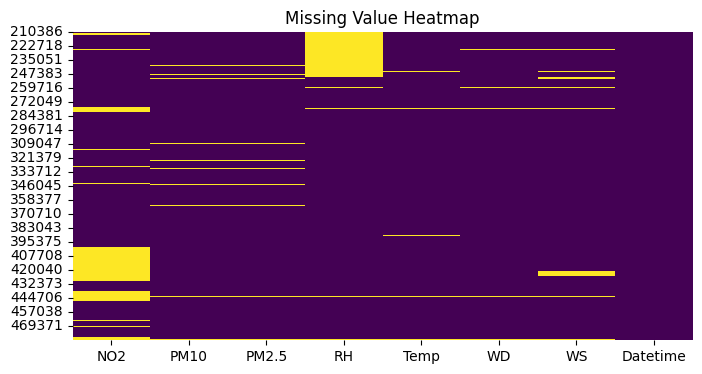


Pattern of Missingness:
0    174835
1     74907
2      9473
3      4467
7      2638
5      1962
4      1052
6        78
Name: count, dtype: int64


In [83]:

print(df11)

# Total missing values per column
print("\nMissing Values per Column:")
print(df11.isnull().sum())

# Percentage of missing values per column
print("\nPercentage of Missing Values per Column:")
print(df11.isnull().mean() * 100)

# Rows with missing values
print("\nRows with Missing Values:")
print(df11[df11.isnull().any(axis=1)])

# Visualize missingness
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(df11.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Check patterns of missingness
print("\nPattern of Missingness:")
print(df11.isnull().sum(axis=1).value_counts())


In [84]:
# Display the original DataFrame
print("Original DataFrame:")
print(df11)

# Fill missing values using forward fill
df12 = df11.ffill()

# Display the DataFrame after forward filling
print("\nDataFrame after Forward Fill:")
print(df12)


Original DataFrame:
            NO2  PM10 PM2.5   RH  Temp     WD   WS            Datetime
210386   30.409  14.7   7.1  NaN  20.7   21.6  0.4 2018-01-01 00:10:00
210387    32.56  12.9   6.8  NaN  20.8   32.5  0.5 2018-01-01 00:20:00
210388   62.923  14.5   7.5  NaN  20.8     48  0.1 2018-01-01 00:30:00
210389   65.855  13.7   6.6  NaN    21    179  0.4 2018-01-01 00:40:00
210390  129.335  14.3   6.9  NaN  21.1  123.3  0.1 2018-01-01 00:50:00
...         ...   ...   ...  ...   ...    ...  ...                 ...
521708      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:10:00
521709      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:20:00
521710      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:30:00
521711      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:40:00
521712      NaN   NaN   NaN  NaN   NaN    NaN  NaN 2023-02-12 23:50:00

[269412 rows x 8 columns]

DataFrame after Forward Fill:
            NO2  PM10  PM2.5    RH  Temp     WD   WS            Dateti

<ipython-input-84-b93f012e1477>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df12 = df11.ffill()


In [85]:
# Count total missing values in the DataFrame
total_missing_values = df12.isna().sum().sum()
print(f"Total missing values: {total_missing_values}")

# Count total values in the DataFrame (total number of elements)
total_values = df12.size  # Total number of elements in the DataFrame
print("Total values in DataFrame:", total_values)

# Calculate percentage of missing values
missing_percentage = (total_missing_values / total_values) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Total missing values: 39039
Total values in DataFrame: 2155296
Percentage of missing values: 1.81%


            NO2  PM10  PM2.5    RH  Temp     WD   WS            Datetime
210386   30.409  14.7   7.10   NaN  20.7   21.6  0.4 2018-01-01 00:10:00
210387   32.560  12.9   6.80   NaN  20.8   32.5  0.5 2018-01-01 00:20:00
210388   62.923  14.5   7.50   NaN  20.8   48.0  0.1 2018-01-01 00:30:00
210389   65.855  13.7   6.60   NaN  21.0  179.0  0.4 2018-01-01 00:40:00
210390  129.335  14.3   6.90   NaN  21.1  123.3  0.1 2018-01-01 00:50:00
...         ...   ...    ...   ...   ...    ...  ...                 ...
521708   14.760  14.9   6.68  73.6   8.5  190.4  0.6 2023-02-12 23:10:00
521709   14.760  14.9   6.68  73.6   8.5  190.4  0.6 2023-02-12 23:20:00
521710   14.760  14.9   6.68  73.6   8.5  190.4  0.6 2023-02-12 23:30:00
521711   14.760  14.9   6.68  73.6   8.5  190.4  0.6 2023-02-12 23:40:00
521712   14.760  14.9   6.68  73.6   8.5  190.4  0.6 2023-02-12 23:50:00

[269412 rows x 8 columns]

Missing Values per Column:
NO2             0
PM10            0
PM2.5           0
RH          390

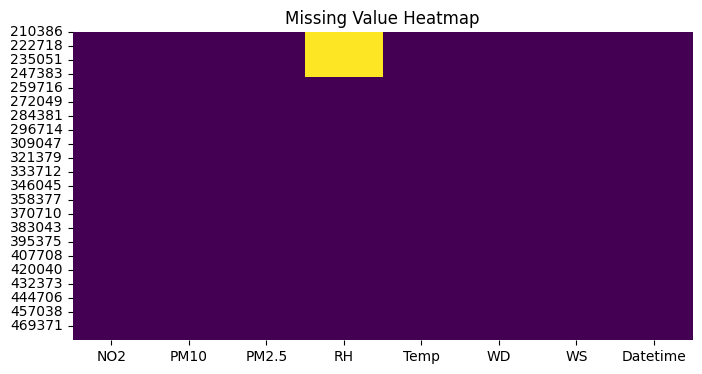


Pattern of Missingness:
0    230373
1     39039
Name: count, dtype: int64


In [86]:

print(df12)

# Total missing values per column
print("\nMissing Values per Column:")
print(df12.isnull().sum())

# Percentage of missing values per column
print("\nPercentage of Missing Values per Column:")
print(df12.isnull().mean() * 100)

# Rows with missing values
print("\nRows with Missing Values:")
print(df12[df12.isnull().any(axis=1)])

# Visualize missingness
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(df12.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Check patterns of missingness
print("\nPattern of Missingness:")
print(df12.isnull().sum(axis=1).value_counts())

In [87]:
# Check for missing values in the 'RH' column
missing_rh = df12[df12['RH'].isnull()]

# Print the datetimes where 'RH' has missing values
if not missing_rh.empty:
    print("Datetimes with missing values in 'RH':")
    print(missing_rh['Datetime'].tolist())  # Replace 'datetime_column' with the actual name of your datetime column
else:
    print("No missing values in 'RH'.")


Datetimes with missing values in 'RH':
[Timestamp('2018-01-01 00:10:00'), Timestamp('2018-01-01 00:20:00'), Timestamp('2018-01-01 00:30:00'), Timestamp('2018-01-01 00:40:00'), Timestamp('2018-01-01 00:50:00'), Timestamp('2018-01-01 01:00:00'), Timestamp('2018-01-01 01:10:00'), Timestamp('2018-01-01 01:20:00'), Timestamp('2018-01-01 01:30:00'), Timestamp('2018-01-01 01:40:00'), Timestamp('2018-01-01 01:50:00'), Timestamp('2018-01-01 02:00:00'), Timestamp('2018-01-01 02:10:00'), Timestamp('2018-01-01 02:20:00'), Timestamp('2018-01-01 02:30:00'), Timestamp('2018-01-01 02:40:00'), Timestamp('2018-01-01 02:50:00'), Timestamp('2018-01-01 03:00:00'), Timestamp('2018-01-01 03:10:00'), Timestamp('2018-01-01 03:20:00'), Timestamp('2018-01-01 03:30:00'), Timestamp('2018-01-01 03:40:00'), Timestamp('2018-01-01 03:50:00'), Timestamp('2018-01-01 04:00:00'), Timestamp('2018-01-01 04:10:00'), Timestamp('2018-01-01 04:20:00'), Timestamp('2018-01-01 04:30:00'), Timestamp('2018-01-01 04:40:00'), Timestam

In [88]:
# Group by hourly intervals, calculate the mean, and drop rows with missing values
df13 = df12.groupby(pd.Grouper(freq='60min', key='Datetime')).mean().reset_index()

# Save the new DataFrame to a CSV file
df13.to_csv('df13.csv', index=True)  # The index (Datetime) will be saved



In [89]:
df13.columns


Index(['Datetime', 'NO2', 'PM10', 'PM2.5', 'RH', 'Temp', 'WD', 'WS'], dtype='object')

In [90]:
df13.head()


Datetime        NO2       PM10     PM2.5  RH       Temp  \
0 2018-01-01 00:00:00  64.216400  14.020000  6.980000 NaN  20.880000   
1 2018-01-01 01:00:00  46.040667  15.966667  8.900000 NaN  21.116667   
2 2018-01-01 02:00:00  28.285000  12.050000  5.183333 NaN  20.716667   
3 2018-01-01 03:00:00  24.381333  12.750000  5.133333 NaN  20.383333   
4 2018-01-01 04:00:00  21.431167  10.700000  4.250000 NaN  20.466667   

           WD        WS  
0   80.880000  0.300000  
1  152.250000  0.233333  
2  163.016667  0.266667  
3   55.550000  0.233333  
4   33.583333  0.250000

In [91]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  45216 non-null  datetime64[ns]
 1   NO2       45216 non-null  float64       
 2   PM10      45216 non-null  float64       
 3   PM2.5     45216 non-null  float64       
 4   RH        38664 non-null  float64       
 5   Temp      45216 non-null  float64       
 6   WD        45216 non-null  float64       
 7   WS        45216 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.8 MB


In [92]:
print(df13)

# Total missing values per column
print("\nMissing Values per Column:")
print(df13.isnull().sum())

# Percentage of missing values per column
print("\nPercentage of Missing Values per Column:")
print(df13.isnull().mean() * 100)

# Rows with missing values
print("\nRows with Missing Values:")
print(df13[df13.isnull().any(axis=1)])

# Visualize missingness
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(df13.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Check patterns of missingness
print("\nPattern of Missingness:")
print(df13.isnull().sum(axis=1).value_counts())

                 Datetime        NO2       PM10     PM2.5         RH  \
0     2018-01-01 00:00:00  64.216400  14.020000  6.980000        NaN   
1     2018-01-01 01:00:00  46.040667  15.966667  8.900000        NaN   
2     2018-01-01 02:00:00  28.285000  12.050000  5.183333        NaN   
3     2018-01-01 03:00:00  24.381333  12.750000  5.133333        NaN   
4     2018-01-01 04:00:00  21.431167  10.700000  4.250000        NaN   
...                   ...        ...        ...       ...        ...   
45211 2023-02-27 19:00:00   9.119333  14.201667  6.553333  67.200000   
45212 2023-02-27 20:00:00   8.962333  14.036667  6.165000  69.583333   
45213 2023-02-27 21:00:00   9.567000  13.128333  5.685000  67.933333   
45214 2023-02-27 22:00:00   8.408667  12.518333  5.603333  69.766667   
45215 2023-02-27 23:00:00   7.899500  12.851667  5.571667  74.300000   

            Temp          WD        WS  
0      20.880000   80.880000  0.300000  
1      21.116667  152.250000  0.233333  
2      20.71


Pattern of Missingness:
0    38664
1     6552
Name: count, dtype: int64


In [93]:
# Ensure Datetime is in the correct format and set as index
df13['Datetime'] = pd.to_datetime(df13['Datetime'])
df13.set_index('Datetime', inplace=True)

# Filter data for 2018
df_2018 = df13.loc['2018']

# Apply backward fill to the RH column for 2018
df13.loc['2018', 'RH'] = df_2018['RH'].fillna(method='bfill')

# Verify the missing values are filled
print("Missing values in RH after backward fill for 2018:")
print(df13.loc['2018', 'RH'].isnull().sum())


Missing values in RH after backward fill for 2018:
0


<ipython-input-93-107a66addd7c>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df13.loc['2018', 'RH'] = df_2018['RH'].fillna(method='bfill')


                           NO2       PM10     PM2.5         RH       Temp  \
Datetime                                                                    
2018-01-01 00:00:00  64.216400  14.020000  6.980000  65.840000  20.880000   
2018-01-01 01:00:00  46.040667  15.966667  8.900000  65.840000  21.116667   
2018-01-01 02:00:00  28.285000  12.050000  5.183333  65.840000  20.716667   
2018-01-01 03:00:00  24.381333  12.750000  5.133333  65.840000  20.383333   
2018-01-01 04:00:00  21.431167  10.700000  4.250000  65.840000  20.466667   
...                        ...        ...       ...        ...        ...   
2023-02-27 19:00:00   9.119333  14.201667  6.553333  67.200000  20.466667   
2023-02-27 20:00:00   8.962333  14.036667  6.165000  69.583333  19.833333   
2023-02-27 21:00:00   9.567000  13.128333  5.685000  67.933333  19.566667   
2023-02-27 22:00:00   8.408667  12.518333  5.603333  69.766667  19.316667   
2023-02-27 23:00:00   7.899500  12.851667  5.571667  74.300000  19.033333   

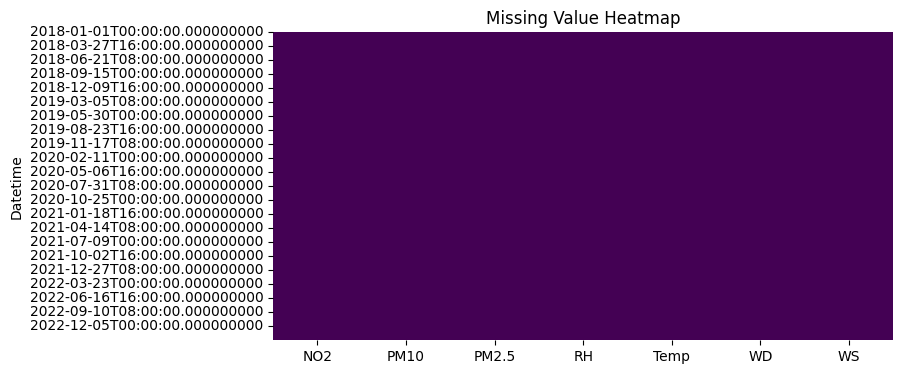


Pattern of Missingness:
0    45216
Name: count, dtype: int64


In [94]:
print(df13)

# Total missing values per column
print("\nMissing Values per Column:")
print(df13.isnull().sum())

# Percentage of missing values per column
print("\nPercentage of Missing Values per Column:")
print(df13.isnull().mean() * 100)

# Rows with missing values
print("\nRows with Missing Values:")
print(df13[df13.isnull().any(axis=1)])

# Visualize missingness
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(df13.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Check patterns of missingness
print("\nPattern of Missingness:")
print(df13.isnull().sum(axis=1).value_counts())

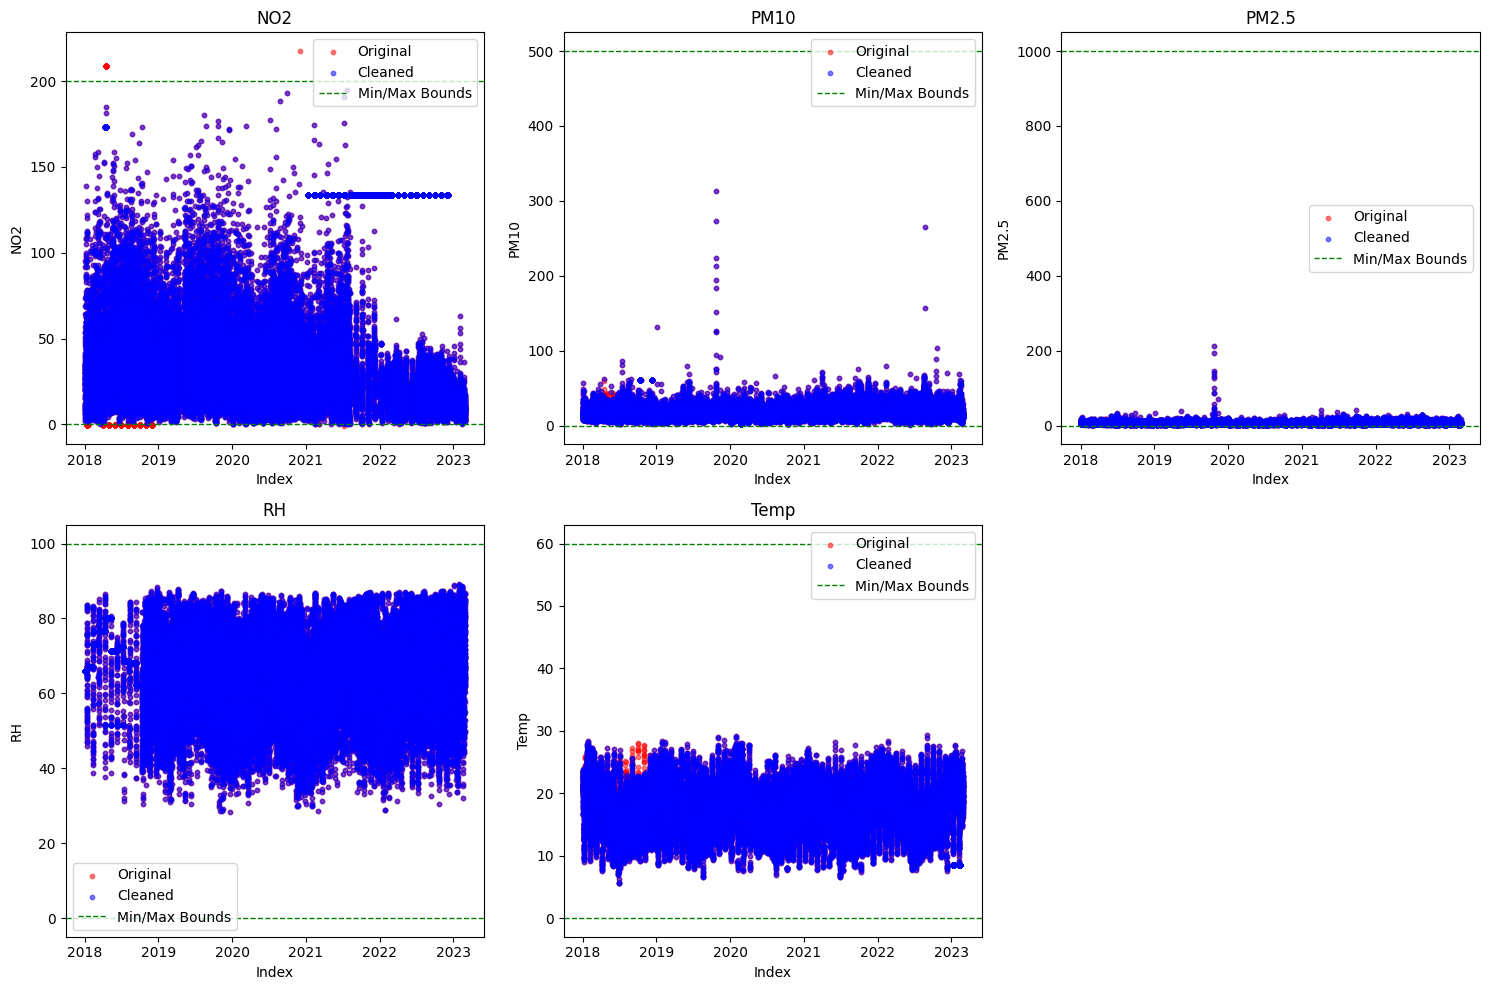

In [95]:
#OUTLIERS
import matplotlib.pyplot as plt

# Define the acceptable ranges for each parameter
ranges = {
    'NO2': (0, 200),
    'PM10': (0, 500),
    'PM2.5': (0, 1000),
    'RH': (0, 100),
    'Temp': (0, 60)
}

# Function to remove outliers
def remove_outliers(df13, ranges):
    for column, (min_val, max_val) in ranges.items():
        if column in df13.columns:
            df13 = df13[(df13[column] >= min_val) & (df13[column] <= max_val)]
    return df13

# Visualize data before and after removing outliers
def visualize_outliers(df13, df14, parameters):
    plt.figure(figsize=(15, 10))
    for i, param in enumerate(parameters, start=1):
        if param in df13.columns:
            plt.subplot(2, len(parameters)//2 + len(parameters)%2, i)
            plt.scatter(df13.index, df13[param], color='red', label='Original', alpha=0.5, s=10)
            plt.scatter(df14.index, df14[param], color='blue', label='Cleaned', alpha=0.5, s=10)
            plt.axhline(ranges[param][0], color='green', linestyle='--', linewidth=1, label='Min/Max Bounds')
            plt.axhline(ranges[param][1], color='green', linestyle='--', linewidth=1)
            plt.title(param)
            plt.xlabel('Index')
            plt.ylabel(param)
            plt.legend()
    plt.tight_layout()
    plt.show()

# Remove outliers from df13
df14 = remove_outliers(df13.copy(), ranges)

# Visualize before and after outlier removal
visualize_outliers(df13, df14, list(ranges.keys()))

In [96]:
# Reset the index to bring 'Datetime' back as a column
df14 = df14.reset_index()

# Now, drop duplicates based on the 'Datetime' column
df14 = df14.drop_duplicates(subset='Datetime', keep='first')

In [97]:
df14.head()

Datetime        NO2       PM10     PM2.5     RH       Temp  \
0 2018-01-01 00:00:00  64.216400  14.020000  6.980000  65.84  20.880000   
1 2018-01-01 01:00:00  46.040667  15.966667  8.900000  65.84  21.116667   
2 2018-01-01 02:00:00  28.285000  12.050000  5.183333  65.84  20.716667   
3 2018-01-01 03:00:00  24.381333  12.750000  5.133333  65.84  20.383333   
4 2018-01-01 04:00:00  21.431167  10.700000  4.250000  65.84  20.466667   

           WD        WS  
0   80.880000  0.300000  
1  152.250000  0.233333  
2  163.016667  0.266667  
3   55.550000  0.233333  
4   33.583333  0.250000

In [98]:
df14.columns

Index(['Datetime', 'NO2', 'PM10', 'PM2.5', 'RH', 'Temp', 'WD', 'WS'], dtype='object')

In [99]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44931 entries, 0 to 44930
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  44931 non-null  datetime64[ns]
 1   NO2       44931 non-null  float64       
 2   PM10      44931 non-null  float64       
 3   PM2.5     44931 non-null  float64       
 4   RH        44931 non-null  float64       
 5   Temp      44931 non-null  float64       
 6   WD        44931 non-null  float64       
 7   WS        44931 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.7 MB


In [100]:
print(df14.head())

             Datetime        NO2       PM10     PM2.5     RH       Temp  \
0 2018-01-01 00:00:00  64.216400  14.020000  6.980000  65.84  20.880000   
1 2018-01-01 01:00:00  46.040667  15.966667  8.900000  65.84  21.116667   
2 2018-01-01 02:00:00  28.285000  12.050000  5.183333  65.84  20.716667   
3 2018-01-01 03:00:00  24.381333  12.750000  5.133333  65.84  20.383333   
4 2018-01-01 04:00:00  21.431167  10.700000  4.250000  65.84  20.466667   

           WD        WS  
0   80.880000  0.300000  
1  152.250000  0.233333  
2  163.016667  0.266667  
3   55.550000  0.233333  
4   33.583333  0.250000  


In [101]:
# Save df14 to a CSV file
df14.to_csv('df14.csv', index=False)

print("DataFrame saved as 'df14.csv'.")

DataFrame saved as 'df14.csv'.
